<a href="https://colab.research.google.com/github/Kr9096/Data-Analysis/blob/main/Car_price_Predictioin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis on Cars Dataset.




In [ ]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Read the data file
df = pd.read_csv("/content/drive/MyDrive/Data Analysis/car data.csv")

*   Applying basic commands on the data to get an overview.

In [ ]:
# Basic info about the data

df.sample(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
272,city,2015,7.5,10.00,27600,Petrol,Dealer,Manual,0
43,dzire,2014,5.5,8.06,45780,Diesel,Dealer,Manual,0


In [ ]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [ ]:
df.shape

(301, 9)

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# EDA

In [ ]:
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


<Figure size 360x360 with 0 Axes>

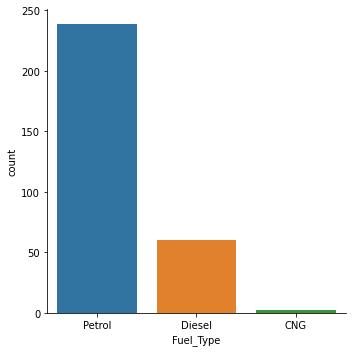

In [ ]:
plt.figure(figsize=(5,5))

sns.catplot(x="Fuel_Type",kind="count",data=df) # More petrol cars

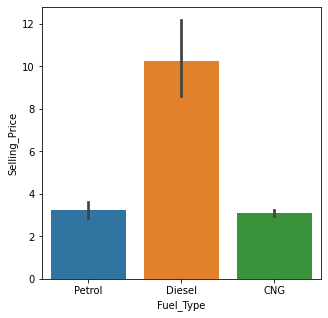

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x= "Fuel_Type", y = "Selling_Price", data = df)   # Selling price for diesel cars is high, they are in demand.

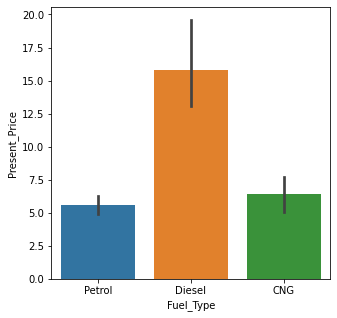

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x= "Fuel_Type", y = "Present_Price", data = df)   # Selling price for diesel cars is high, they are in demand.

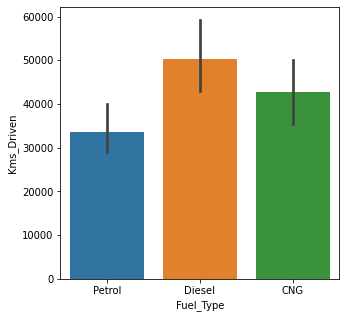

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x= "Fuel_Type", y = "Kms_Driven", data = df)   # Diesel cars are driven more.

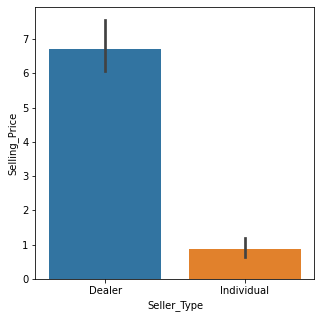

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x= "Seller_Type", y = "Selling_Price", data = df)   # Selling price is high if you buy from a dealer.

# Encoding the categorical values

In [ ]:
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [ ]:
# WE have 3 catg variables and they don't have any relationship, So we can use OHE but  we can also use ordinal encoder

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

# Labelencoder for Y-columns(dependent column)
# Ordinal encoding for X-columns which has relationship

In [ ]:
df["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
oe = OrdinalEncoder()

In [ ]:
df[["Fuel_Type","Seller_Type","Transmission"]] = oe.fit_transform(df[["Fuel_Type","Seller_Type","Transmission"]])

In [ ]:
df["Fuel_Type"].value_counts()

2.0    239
1.0     60
0.0      2
Name: Fuel_Type, dtype: int64

In [ ]:
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2.0,0.0,1.0,0
1,sx4,2013,4.75,9.54,43000,1.0,0.0,1.0,0


# Splitting| the data

In [ ]:
X = df.drop(["Car_Name","Selling_Price"],axis=1)
y = df["Selling_Price"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 4)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((240, 7), (61, 7), (240,), (61,))

# Model building

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression,Lasso

In [ ]:
linear_R = LinearRegression()
linear_R.fit(X_train,y_train)


LinearRegression()

# Accuracy Score is used for Classification problem
# R2_score is used for Regression problem

In [ ]:
from sklearn import metrics

# For Test data

lr_p_test = linear_R.predict(X_test)  # For Test data the R-square is high
metrics.r2_score(lr_p_test,y_test)

0.7418982437353605

In [ ]:
# Another way to validate this accuracy

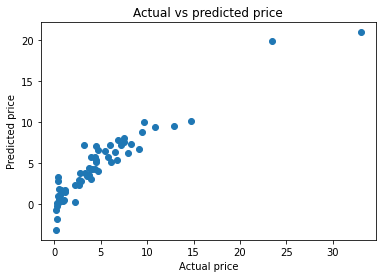

In [ ]:
# For Test data prediction

plt.scatter(y_test,lr_p_test)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs predicted price")       # The model is not accurate because the points are near but merged  
plt.show()   

In [ ]:
# For Train data
lr_p = linear_R.predict(X_train)
metrics.r2_score(lr_p,y_train)     

0.8708673007686495

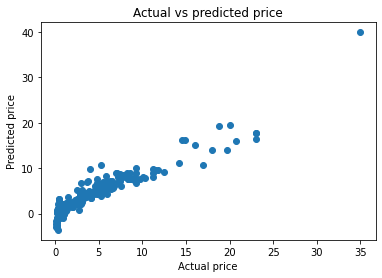

In [ ]:
# For Train data prediction

plt.scatter(y_train,lr_p)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs predicted price")
plt.show()

### Most of the points are merged together below 10, it means the model is predicting well when the prices are low, when the price increases than the model is predicting slightly different values.

# The thumb rule is that, if the R2 score is low than the model is accurate.
# But it is not true all the times because it depends on the magnitude of the values.

# Linear Regression performs well when there is a postive correlation between the variables, it means if one value increases than the other value increases

# The Lasso,XGboost performs well in most of the cases

In [ ]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [ ]:
lasso_p = lasso.predict(X_test)
metrics.r2_score(lasso_p,y_test)     # We got a very good r2 score, it means our model is performing well. Lets validate this

0.5792759563086196

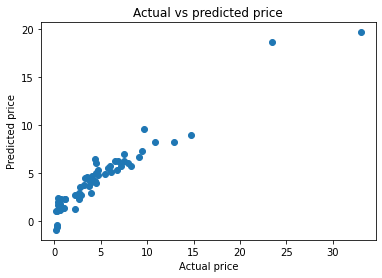

In [ ]:
# For Test data prediction

plt.scatter(y_test,lasso_p)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs predicted price")
plt.show()                                # compare to the linear regression, the points are much closer

In [ ]:
# For Train data prediction
lasso_p_train = lasso.predict(X_train)
metrics.r2_score(lasso_p,y_train) 

0.7988156052869446

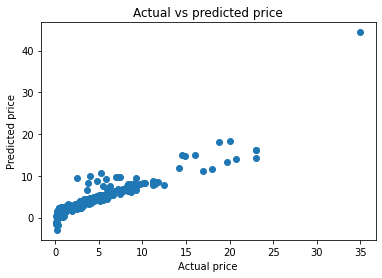

In [ ]:

plt.scatter(y_train,lasso_p_train)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs predicted price")
plt.show()